In [77]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# task 1

In [2]:
!pwd

/home/kevin/Git_learning_repos/anno2/MLDM_learning_repo/Machine Learning/labs/Lab-topic-7-association-rules


In [80]:
url = "./Online-Retail-France.xlsx"
df = pd.read_excel(url)

print(df.shape)

df.head()

(8557, 7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


# task 2

It is a transactional database where the role of transaction identifier is played by the column InvoiceNo and the items are in the column Description.

Print the number of unique Description values 

In [81]:
len(df["Description"].unique())
# Oppure
# df["Description"].nunique()

1565

# task 3

Some descriptions represent the same item but have different leading or trailing spaces, therefore they must be made uniform with the Pandas
function str.strip()

Print the number of unique Description values after this cleaning

In [82]:
print(df["Description"].nunique())

df["Description"] = df["Description"].str.strip()
len(df["Description"].unique())

1565


1564

# task 4

Some rows may not have an InvoiceNo and must be removed, because they cannot be used. 

Check if there are such that rows and in case remove them. Inspect the effect of this cleaning

In [83]:
df.loc[len(df)] = [None, 1 , 1 , 1, 1, 1, 1]
# print(df)

# df["InvoiceNo"] == None # '== None' NON funziona, bisogna usare il metodo

print(df[df["InvoiceNo"].isna()])
new_df = df.dropna(subset=["InvoiceNo"])
print(f"erano presenti such rows? {len(df) != len(new_df)}")
df = new_df

     InvoiceNo StockCode Description  Quantity InvoiceDate  UnitPrice  \
8557       NaN       1.0         1.0       1.0         1.0        1.0   

      CustomerID  
8557         1.0  
erano presenti such rows? True


# Task 5

Some InvoiceNo start with a C. They are "credit transactions" and must be removed. Inspect the effect of this cleaning.

In [84]:
print(df[df["InvoiceNo"].str.startswith("C")].index)
df = df.drop(df[df["InvoiceNo"].str.startswith("C")].index)
df

Index([ 178,  179,  180,  354,  356,  439,  440,  561,  695,  966,
       ...
       8318, 8319, 8320, 8321, 8322, 8323, 8324, 8539, 8540, 8541],
      dtype='int64', length=149)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24.0,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
8552,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0
8553,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0
8554,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0
8555,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0


# Task 6
Several transactions include the item POSTAGE, which represents the mailing expenses.

In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed.
    
Inspect the effect of this cleaning

In [85]:
print(df[df["Description"] == "POSTAGE"].index)
df = df.drop(df[df["Description"] == "POSTAGE"].index)
df

Index([  19,   26,   42,  105,  146,  165,  177,  181,  196,  237,
       ...
       8382, 8415, 8417, 8441, 8471, 8476, 8496, 8508, 8534, 8538],
      dtype='int64', length=300)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24.0,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
8552,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0
8553,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0
8554,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0
8555,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0


# Task 7

After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded.

To do so:
- group by InvoiceNo and Description computing a sum on Quantity
- use the Pandas unstack function to move the items from rows to columns
- reset the index
- fill the missing with zero
- store the result in a new dataframe basket and inspect it

In [28]:
# groupby serve a raggruppare le righe che hanno lo stesso valore per uno o più attributti
# e poi applicare un’operazione (come sum, mean, count, ecc.).
df.groupby(["InvoiceNo", "Description"])

In [47]:
# nota qua stiamo sommando insieme tutte le colonne numeriche non solo quantity (infatti otteniamo un dataframe)
df.groupby(["InvoiceNo", "Description"]).sum()

StockCode  Quantity  \
InvoiceNo Description                                           
536370    ALARM CLOCK BAKELIKE GREEN          22726      12.0   
          ALARM CLOCK BAKELIKE PINK           22728      24.0   
          ALARM CLOCK BAKELIKE RED            22727      24.0   
          CHARLOTTE BAG DOLLY GIRL DESIGN     22661      20.0   
          CIRCUS PARADE LUNCH BOX             22631      24.0   
...                                             ...       ...   
581587    CIRCUS PARADE LUNCH BOX             22631      12.0   
          PACK OF 20 SPACEBOY NAPKINS         22613      12.0   
          PLASTERS IN TIN CIRCUS PARADE       22556      12.0   
          PLASTERS IN TIN STRONGMAN           22555      12.0   
          SPACEBOY LUNCH BOX                  22629      12.0   

                                                   InvoiceDate  UnitPrice  \
InvoiceNo Description                                                       
536370    ALARM CLOCK BAKELIKE GREEN       2010-12-01 08:45:00       3.75   
          ALARM CLOCK BAKELIKE PINK        2010-12-01 08:45:00       3.75   
          ALARM CLOCK BAKELIKE RED         2010-12-01 08:45:00       3.75   
          CHARLOTTE BAG DOLLY GIRL DESIGN  2010-12-01 08:45:00       0.85   
          CIRCUS PARADE LUNCH BOX          2010-12-01 08:45:00       1.95   
...                                                        ...        ...   
581587    CIRCUS PARADE LUNCH BOX          2011-12-09 12:50:00       1.95   
          PACK OF 20 SPACEBOY NAPKINS      2011-12-09 12:50:00       0.85   
          PLASTERS IN TIN CIRCUS PARADE    2011-12-09 12:50:00       1.65   
          PLASTERS IN TIN STRONGMAN        2011-12-09 12:50:00       1.65   
          SPACEBOY LUNCH BOX               2011-12-09 12:50:00       1.95   

                                           CustomerID  
InvoiceNo Description                                  
536370    ALARM CLOCK BAKELIKE GREEN          12583.0  
          ALARM CLOCK BAKELIKE PINK           12583.0  
          ALARM CLOCK BAKELIKE RED            12583.0  
          CHARLOTTE BAG DOLLY GIRL DESIGN     12583.0  
          CIRCUS PARADE LUNCH BOX             12583.0  
...                                               ...  
581587    CIRCUS PARADE LUNCH BOX             12680.0  
          PACK OF 20 SPACEBOY NAPKINS         12680.0  
          PLASTERS IN TIN CIRCUS PARADE       12680.0  
          PLASTERS IN TIN STRONGMAN           12680.0  
          SPACEBOY LUNCH BOX                  12680.0  

[8072 rows x 5 columns]

In [46]:
# se vogliamo sommare solo su quantity bisogna fare così
# nota come otteniamo una series con indice multidimensionale,
# ogni somma è indicizzata da una coppia (InvoiceNo, Description)
df.groupby(["InvoiceNo", "Description"])["Quantity"].sum()

InvoiceNo  Description                    
536370     ALARM CLOCK BAKELIKE GREEN         12.0
           ALARM CLOCK BAKELIKE PINK          24.0
           ALARM CLOCK BAKELIKE RED           24.0
           CHARLOTTE BAG DOLLY GIRL DESIGN    20.0
           CIRCUS PARADE LUNCH BOX            24.0
                                              ... 
581587     CIRCUS PARADE LUNCH BOX            12.0
           PACK OF 20 SPACEBOY NAPKINS        12.0
           PLASTERS IN TIN CIRCUS PARADE      12.0
           PLASTERS IN TIN STRONGMAN          12.0
           SPACEBOY LUNCH BOX                 12.0
Name: Quantity, Length: 8072, dtype: float64

In [43]:
# unstack serve a spostare l'ultimo indice di riga (Description) e a farlo diventare
# un indice di colonna. 
#
# Prima di unstack abbiamo che per un determinato InvoiceNo possiamo
# avere N righe (con N numero totale di Description distinte).
#
# Facendo unstack abbiamo spostato le N Description di ogni InvoiceNo in N colonne.
# L'indice diventa così unidimensionale e, per le Description di un determinato InvoiceNum
# nella sua colonna abbiamo il valore della somma che c'era presente prima, per le Description
# non presenti per un determinato InvoiceNo abbiamo invece NaN
df.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().sample(10)

# chiaramente stack() fà il contrario
# df.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().stack()

# si chiamano stack e unstack perchè i valori della description possono essere 
# impilati verticalmente nella versione stacked, oppure distesi orizzontalmente
# nella version unstacked

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
540365,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541138,24.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Dopo unstack "InvoiceNo" è la colonna indice del df, con reset_index 
# la facciamo tornare una colonna normale (non so a che serve ma mi faccio pochi problemi)
# NB: Description è rimasto semplicemente il nome dell'asse delle colonne
# è rimasto sopra alla colonna dell'indice solo per visualizzazione infelice
df.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index()

Description,InvoiceNo,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,536370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,537065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,537463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,580986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,581001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,581171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,581279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
basket = df.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0)
basket.sample(20)

Description,InvoiceNo,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
30,540789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,565587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,543625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,553195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,577121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
315,574918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0,0.0,0.0
288,570851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,547504,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,556886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,578287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task 8
There are a lot of zeros in the data but we also need to convert to True the positive values and to False the non–positive values.
    
Inspect the result of this transformation and verify the correctness.

In [105]:
from sklearn.preprocessing import Binarizer

new_basket = Binarizer().fit_transform(basket).astype(bool)
basket = pd.DataFrame(new_basket, columns=basket.columns)
basket

Description,InvoiceNo,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
383,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
385,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Task 9

find the maximum value of min_support such that the number of rules generated from the frequent itemsets with lift not less than 1 is at least 20. 

Show the value obtained for min_support and show the rules.

Hint: use a loop with an initial value min_support=1 and decrease it in steps -0.01
Hint: In apriori set the parameter use_colnames=True

In [124]:

for min_sup in np.arange(1, 0, -0.01):
    frequent_itemsets = apriori(basket, min_support=min_sup, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    if len(rules) >= 20:
        break

print(f"min support: {min_sup:.02f}")
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules

min support: 0.13


/home/kevin/.local/share/mise/installs/python/3.14.0/lib/python3.14/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/kevin/.local/share/mise/installs/python/3.14.0/lib/python3.14/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/kevin/.local/share/mise/installs/python/3.14.0/lib/python3.14/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/kevin/.local/share/mise/installs/python/3.14.0/lib/python3.14/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_

,antecedents,consequents,support,confidence,lift
0,(LUNCH BAG RED RETROSPOT),(InvoiceNo),0.155039,1.000000,1.0
1,(InvoiceNo),(LUNCH BAG RED RETROSPOT),0.155039,0.155039,1.0
2,(LUNCH BOX WITH CUTLERY RETROSPOT),(InvoiceNo),0.144703,1.000000,1.0
3,(InvoiceNo),(LUNCH BOX WITH CUTLERY RETROSPOT),0.144703,0.144703,1.0
4,(InvoiceNo),(PLASTERS IN TIN CIRCUS PARADE),0.170543,0.170543,1.0
5,(PLASTERS IN TIN CIRCUS PARADE),(InvoiceNo),0.170543,1.000000,1.0
6,(PLASTERS IN TIN SPACEBOY),(InvoiceNo),0.139535,1.000000,1.0
7,(InvoiceNo),(PLASTERS IN TIN SPACEBOY),0.139535,0.139535,1.0
8,(InvoiceNo),(PLASTERS IN TIN WOODLAND ANIMALS),0.173127,0.173127,1.0
9,(PLASTERS IN TIN WOODLAND ANIMALS),(InvoiceNo),0.173127,1.000000,1.0


# Task 10
In order to scatter–plot some information about the rules, it is better to sort them according to some metrics.

We will sort on descending lift and confidence, then do a scatter plot

In [128]:
rules = rules.sort_values(by=["lift", "confidence"], ascending=False)
rules

,antecedents,consequents,support,confidence,lift
0,(LUNCH BAG RED RETROSPOT),(InvoiceNo),0.155039,1.000000,1.0
2,(LUNCH BOX WITH CUTLERY RETROSPOT),(InvoiceNo),0.144703,1.000000,1.0
5,(PLASTERS IN TIN CIRCUS PARADE),(InvoiceNo),0.170543,1.000000,1.0
6,(PLASTERS IN TIN SPACEBOY),(InvoiceNo),0.139535,1.000000,1.0
9,(PLASTERS IN TIN WOODLAND ANIMALS),(InvoiceNo),0.173127,1.000000,1.0
10,(RABBIT NIGHT LIGHT),(InvoiceNo),0.191214,1.000000,1.0
12,(RED RETROSPOT MINI CASES),(InvoiceNo),0.139535,1.000000,1.0
14,(RED TOADSTOOL LED NIGHT LIGHT),(InvoiceNo),0.183463,1.000000,1.0
17,(ROUND SNACK BOXES SET OF4 WOODLAND),(InvoiceNo),0.160207,1.000000,1.0
18,(SET/20 RED RETROSPOT PAPER NAPKINS),(InvoiceNo),0.134367,1.000000,1.0


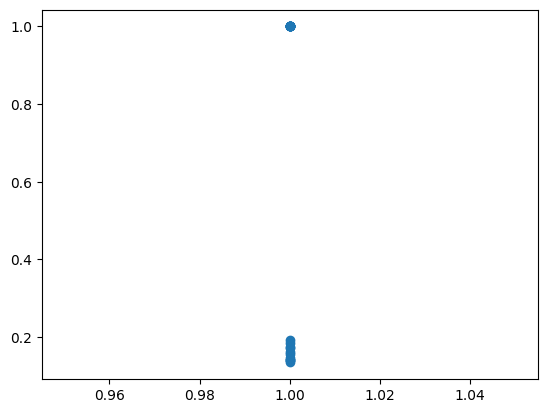

In [132]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(rules["lift"], rules["confidence"])